# PyFolding SI Notebook 3
---

[Author] ERGM

---


## Performing and automating higher-level calculations such as &#916;Gs & Phi-value analysis 

In this notebook we will show how imported and fitted equilbrium and kinetic folding data (as per PyFolding SI Notebooks 1 and 2) can be associated with a particular protein (say WT or a mutant).  This enables higher higher-level calculations such as &#916;Gs & Phi-value analysis to be achieved (also shown here).

If you are less script/computer orientated, you can simply change the data paths/variables, etc for your proteins and re-run the jupyter notebook ( "Kernal/Restart & Run all" from the menu above).

---

### Data Format

Please see PyFolding SI Notebooks 1 and 2 for the format your data has to be in to enable this type of analysis.

---

In [1]:
#  First off lets load pyfolding & pyplot into this ipython notebook 
#(pyplot allows us to plot more complex figures of our results):

%matplotlib inline

# import pyfolding, the pyfolding models and ising models
import pyfolding
from pyfolding import *

# import the package for plotting, call it plt
import matplotlib.pyplot as plt

# import numpy as well
import numpy as np

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


---

#### Now, we need to load some data to analyse.

In this notebook I will be using data that I have digitized from the papers below:

```
Folding of chymotrypsin inhibitor 2. 1. Evidence for a two-state transition.
Jackson, S. E. & Fersht, A. R.
Biochemistry 30, 10428–10435 (1991).

Structure of the hydrophobic core in the transition state for folding of chymotrypsin inhibitor 2: a critical test of the protein engineering method of analysis.
Jackson, S. E., elMasry, N. & Fersht, A. R.
Biochemistry 32, 11270–11278 (1993).


```
[http://pubs.acs.org/doi/abs/10.1021/bi00107a010 & http://pubs.acs.org/doi/abs/10.1021/bi00093a002]

In [2]:
# start by loading a data set
# arguments are "path", "filename"
# We will do Equilm and Kinetics all together

pth = "../examples/CI2/"

#load CI2 WT equilm and kinetics
EquilmWT_CI2 = pyfolding.read_equilibrium_data(pth,"CI2_WT_Equilm.csv")
KineticsWT_CI2 = pyfolding.read_kinetic_data(pth,"CI2_WT_Kinetics.csv")

# load CI2 Mutant VA38
EquilmVA38_CI2 = pyfolding.read_equilibrium_data(pth,"CI2_VA38_Equilm.csv")
KineticsVA38_CI2 = pyfolding.read_kinetic_data(pth,"CI2_VA38_Kinetics.csv")


# load CI2 Mutant VA66
EquilmVA66_CI2 = pyfolding.read_equilibrium_data(pth,"CI2_VA66_Equilm.csv")
KineticsVA66_CI2 = pyfolding.read_kinetic_data(pth,"CI2_VA66_Kinetics.csv")


# load CI2 Mutant IV48
EquilmIV48_CI2 = pyfolding.read_equilibrium_data(pth,"CI2_IV48_Equilm.csv")
KineticsIV48_CI2 = pyfolding.read_kinetic_data(pth,"CI2_IV48_Kinetics.csv")


---

### OK, to perform and automate higher-level calculations such as &#916;Gs & Phi-value analysis

1st we need to assign data to a specific protein by making a "protein object" 


In [3]:
#assign WT
WT = pyfolding.Protein(ID="CI2_WT")         # creating CI2_WT protein object 
WT.equilibrium = EquilmWT_CI2               # assigning equilm data to the CI2_WT protein object
WT.chevron = KineticsWT_CI2                 # assigning kinetic data to the CI2_WT protein object

#assign VA38
VA38 = pyfolding.Protein(ID="CI2_VA38")     # creating CI2_WT protein object 
VA38.equilibrium = EquilmVA38_CI2           # assigning equilm data to the CI2_WT protein object
VA38.chevron = KineticsVA38_CI2             # assigning kinetic data to the CI2_WT protein object

#assign VA66
VA66 = pyfolding.Protein(ID="CI2_VA66")     # creating CI2_WT protein object 
VA66.equilibrium = EquilmVA66_CI2           # assigning equilm data to the CI2_WT protein object
VA66.chevron = KineticsVA66_CI2             # assigning kinetic data to the CI2_WT protein object

#assign IV48
IV48 = pyfolding.Protein(ID="CI2_IV48")     # creating CI2_WT protein object 
IV48.equilibrium = EquilmIV48_CI2           # assigning equilm data to the CI2_WT protein object
IV48.chevron = KineticsIV48_CI2             # assigning kinetic data to the CI2_WT protein object

# lets put these in a python list for later on!
Proteins = [WT, 
            VA38, 
            VA66, 
            IV48]


In [4]:
# make a python list of the data so we can fit data together and check everything loaded correctly
Equilm_curves = [EquilmWT_CI2, 
                 EquilmVA38_CI2,
                 EquilmVA66_CI2,
                 EquilmIV48_CI2]

Kinetic_chevrons = [KineticsWT_CI2, 
                    KineticsVA38_CI2, 
                    KineticsVA66_CI2,
                    KineticsIV48_CI2]

---

### Now we need to fit the data.  
In a similar manner to previous notebooks, we can save time by getting PyFolding to automate the fitting all our data to the model we want:


In [5]:
# Set temperature to 25.00°C
# (NOTE: Careful, this sets the temperature for all subsequent calculations)
pyfolding.set_temperature(25.)

# fit all the data automatically

# first lets fit the equilibrium denaturations (we will be using the lists we defined above in cell [5])
for c in Equilm_curves: 
    c.fit_func = models.TwoStateEquilibrium
    c.fit(p0=[3, 2])  

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)
Fitting results
ID: CI2_WT_Equilm
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m      1.86581 ± 0.00075    	 95% CI[   1.86563,    1.86600]
(f) d50    3.98689 ± 0.00013    	 95% CI[   3.98686,    3.98693]
--------------------------------------------------------------------------------
R^2: 0.99809


Fitting results
ID: CI2_VA38_Equilm
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m      2.00158 ± 0.00122    	 95% CI[   2.00127,    2.00188]
(f) d50    3.74752 ± 0.00019    	 95% CI[   3.74748,    3.74757]
--------------------------------------------------------------------------------
R^2: 0.99720


Fitting results
ID: CI2_VA66_Equilm
Model: TwoStateEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) m      1.

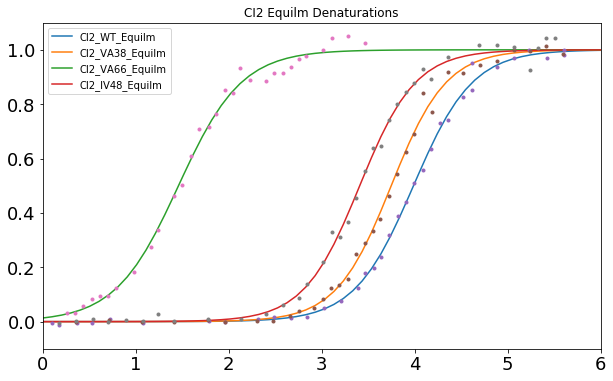

In [6]:
# Before we go further lets check everything looks good!

# the following commands plot all the Equilm curves & fits on one plot

plt.figure(figsize=(10,6))
for c in Equilm_curves:
    plt.plot(c.results.x_fit, c.results.y_fit, '-')
for c in Equilm_curves:
    plt.plot(c.x, c.y, '.')

# This is to make the plot look good!  

plt.legend([c.ID for c in Equilm_curves], loc='best') # plots a legend & 'loc" command determines where it goes.  
plt.title("CI2 Equilm Denaturations")                 # plots a title.
plt.ylim([-0.1, 1.1])                                 # y axis from 0 to 8
plt.xlim([0, 6])                                      # x axis from 0 to 5
plt.show()    


In [14]:
# Now lets fit the kinetics
for c in Kinetic_chevrons: 
    c.fit_func = models.TwoStateChevron
    c.fit()

Fitting results
ID: CI2_WT_Kinetics
Model: TwoStateChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kf   57.74792 ± 0.08261    	 95% CI[  57.72761,   57.76823]
(f) mf    1.90608 ± 0.00111    	 95% CI[   1.90581,    1.90636]
(f) ku    0.00013 ± 0.00000    	 95% CI[   0.00013,    0.00013]
(f) mu    1.29050 ± 0.00248    	 95% CI[   1.28989,    1.29111]
--------------------------------------------------------------------------------
R^2: 0.99939


Fitting results
ID: CI2_VA38_Kinetics
Model: TwoStateChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kf   70.14623 ± 0.05693    	 95% CI[  70.13226,   70.16019]
(f) mf    1.81407 ± 0.00055    	 95% CI[   1.81393,    1.81420]
(f) ku    0.00037 ± 0.00000    	 95% CI[   0.00037,    0.00037]
(f) mu    1.37146 ± 0.00121    	 95% CI[   1.37116,    1.37175]
--------------------------------------------------------------------------------
R^2: 0.99960


Fitting resu

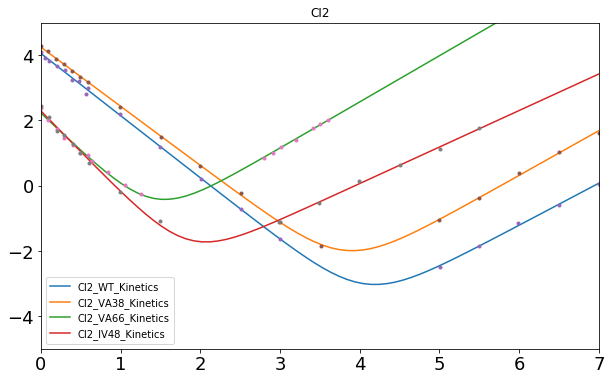

In [8]:
# Before we go further lets check everything looks good!

# the following commands plot all the kinetics on one plot
plt.figure(figsize=(10,6))
for c in Kinetic_chevrons:
    plt.plot(c.results.x_fit, c.results.y_fit, '-')
for c in Kinetic_chevrons:
    plt.plot(c.x, c.y, '.')
    
# as before this is to make the plot look good!  

plt.legend([c.ID for c in Kinetic_chevrons], loc='best')  # plots a legend & 'loc" command determines where it goes.  
plt.title("CI2")                                          # plots a title.
plt.ylim([-5, 5])                                         # y axis from 0 to 8
plt.xlim([0, 7])                                          # x axis from 0 to 5
plt.show()    

  

---

### Now lets perform and automate some higher-level calculations such as ΔGs & Phi-value analysis :



In [9]:
# Lets start with the free energy of unfolding (ΔGD-N) [calculated from the equilm m-value and midpoint] 
# we can get an individual values for each protein by calling up our protein objects we defined right at the start of this notebook {in cell (3)}  
# Lets try it for WT

print WT.deltaG



7.43880166047


In [10]:
# Now we can automate with the list we created at the start of this notebook {in cell (3)}
# from the list in cell (3) the order should be: WT, VA38, IV48 & IA48

for c in Proteins:
    print c.deltaG

7.43880166047
7.50095692618
2.55121373848
6.70638772946


In [11]:
# We can also do caluclations on any of the data we have. Lets calculate some DDG values for VA66 

# Stability change in water between VA66 and WT (i.e. DDG from Equilibrium curves)
ddg = WT.deltaG - VA66.deltaG

# Free Energy change between Denatured and Transition State between VA66 and WT (i.e. DDG from folding rates in water)

ddts = constants.RT * np.log(WT.kf_H20 / VA66.kf_H20)

print ddg, ddts


4.88758792199 0.354099722209


In [12]:
# Lets finish by calculating some Phi Values
# we can get an individual value by calling up our protein objects we defined at the start of this notebook {in cell (3)}  
# Lets try it for the mutant VA38

from pyfolding.phi import phi
        
PhiValue = phi(WT,VA66)

print PhiValue

0.0724487677482


In [13]:
# Now we can automate with the list we created also at the start of this notebook {in cell (3)}
# from the list in cell (3) the order should be a Phi value for VA38, IV48 & IA48
mut_proteins = Proteins[1:]

for c in mut_proteins:
    c_phi_value = phi(WT, c)
    print "{0:s} --> Phi value: {1:.2f}".format(c.ID, c_phi_value)

CI2_VA38 --> Phi value: 0.45
CI2_VA66 --> Phi value: 0.07
CI2_IV48 --> Phi value: 0.46


### As you can see this works.  YAY!

#### However, the final Phi values are different from the original CI2 paper due to errors from digitizing the data.
For example, VA38 - has a very small difference in stability from WT.  Thus when digitising this causes a large error in the reported Phi values.


---

### End of this Notebook.

---